In [1]:
import numpy as np 
import pylab as plt
import networkx as nx #for creating and manipulating complex network ie graphs
import pandas as pd

In [2]:
#undirected graph
edge_list = [(0,2),(0,1),(0,3),(2,4),(5,6),(7,4),(0,6),(5,3),(3,7),(0,8)]

In [3]:
goal = 7

In [4]:
G = nx.Graph()
G.add_edges_from(edge_list)

In [5]:
position = nx.spring_layout(G) #render graph on screen spring layout for display graph using force directed graph minimise overlap edges and equal length edge

C:\Users\vijaygarg01\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


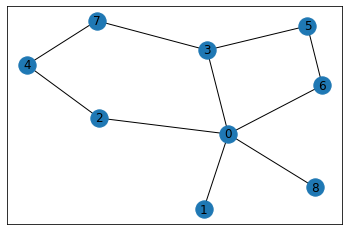

In [8]:
nx.draw_networkx_edges(G,position)
nx.draw_networkx_nodes(G,position)
nx.draw_networkx_labels(G,position)
plt.show()

In [9]:
Size_matrix=9 #reward and Q table every row,col represent node

In [31]:
#reward matrix
R = np.matrix(np.ones(shape=(Size_matrix,Size_matrix)))
R*=-1

In [32]:
for edge in edge_list:
    print(edge)
    if(edge[1]==goal or edge[0]==goal):
        if(edge[0]==goal):
            R[edge[1],edge[0]]=100
        else:
            R[edge[0],edge[1]]=100

        
    else:
        R[edge[1],edge[0]]=0
        R[edge[0],edge[1]]=0

(0, 2)
(0, 1)
(0, 3)
(2, 4)
(5, 6)
(7, 4)
(0, 6)
(5, 3)
(3, 7)
(0, 8)


In [33]:
R

matrix([[ -1.,   0.,   0.,   0.,  -1.,  -1.,   0.,  -1.,   0.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1., 100.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.,  -1.],
        [ -1.,  -1.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.]])

In [34]:
R[goal,goal]=100

In [35]:
R


matrix([[ -1.,   0.,   0.,   0.,  -1.,  -1.,   0.,  -1.,   0.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1., 100.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.,  -1.],
        [ -1.,  -1.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1., 100.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.]])

In [36]:
gamma = 0.8 #future reward

In [37]:
Q = np.matrix(np.zeros([Size_matrix,Size_matrix]))  #Q table

In [52]:
def get_available_actions(state):
    #state is node in graph
    current_state_row=R[state,]
#     print(current_state_row)
    available_actions = np.where(current_state_row>=0)[1] # node to which current node leads
    return available_actions

In [57]:
def sample_next_action(available_actions):
    next_action=int(np.random.choice(available_actions,size=1))
    return next_action

In [45]:
def update(current_state,action,gamma):
    max_index = np.where(Q[action,]==np.max(Q[action,]))[1] #index of highest Q value
    print('max_index',max_index.shape)
    if(max_index.shape[0]>1):
        max_index = int(np.random.choice(max_index,size=1))
    else:
        max_index=int(max_index)
    max_value = Q[action,max_index]
    Q[current_state,action]=R[current_state,action]+gamma*max_value
    print('max_value',Q[current_state,action])
    return max_index

In [53]:
 initial_state=0

In [54]:
available_actions = get_available_actions(initial_state)
print(available_actions)

[1 2 3 6 8]


In [58]:
action = sample_next_action(available_actions)

In [59]:
print(action)

8


In [60]:
R

matrix([[ -1.,   0.,   0.,   0.,  -1.,  -1.,   0.,  -1.,   0.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1., 100.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.,  -1.],
        [ -1.,  -1.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1., 100.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.]])

In [61]:
Q

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [62]:
 update(initial_state,action,gamma)

max_index (9,)
max_value 0.0


3

In [67]:
for i in range(700):
    current_state = np.random.randint(0,int(Q.shape[0]))
    available_action = get_available_actions(current_state)
    action = sample_next_action(available_action)
    update(current_state,action,gamma)

max_index (9,)
max_value 0.0
max_index (9,)
max_value 100.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (1,)
max_value 180.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (1,)
max_value 244.0
max_index (1,)
max_value 244.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (1,)
max_value 244.0
max_index (1,)
max_value 195.20000000000002
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (1,)
max_value 195.20000000000002
max_index (9,)
max_value 0.0
max_index (1,)
max_value 156.16000000000003
max_index (9,)
max_value 0.0
max_index (1,)
ma

max_index (1,)
max_value 319.8961540628294
max_index (1,)
max_value 319.8961540628294
max_index (1,)
max_value 319.8961540628294
max_index (1,)
max_value 319.8961540628294
max_index (1,)
max_value 319.8961540628294
max_index (1,)
max_value 319.8961540628294
max_index (1,)
max_value 255.9468308801687
max_index (1,)
max_value 499.965971763308
max_index (1,)
max_value 319.93353860021085
max_index (1,)
max_value 319.8961540628294
max_index (1,)
max_value 319.8961540628294
max_index (1,)
max_value 319.8961540628294
max_index (1,)
max_value 499.965971763308
max_index (1,)
max_value 319.93353860021085
max_index (1,)
max_value 319.8961540628294
max_index (1,)
max_value 319.8961540628294
max_index (1,)
max_value 499.965971763308
max_index (1,)
max_value 319.8961540628294
max_index (1,)
max_value 319.8961540628294
max_index (1,)
max_value 319.8961540628294
max_index (1,)
max_value 319.8961540628294
max_index (1,)
max_value 255.91692325026352
max_index (1,)
max_value 319.8961540628294
max_index (

In [69]:
print(Q)

[[  0.         255.99880274 319.99429101 399.99812928   0.
    0.         255.9995096    0.         255.99880274]
 [319.99850342   0.           0.           0.           0.
    0.           0.           0.           0.        ]
 [319.99850342   0.           0.           0.         399.99880274
    0.           0.           0.           0.        ]
 [319.99850342   0.           0.           0.           0.
  319.999387     0.         499.999387     0.        ]
 [  0.           0.         319.99904219   0.           0.
    0.           0.         499.999387     0.        ]
 [  0.           0.           0.         399.99923375   0.
    0.         255.9995096    0.           0.        ]
 [319.99850342   0.           0.           0.           0.
  319.999387     0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.         499.999387     0.        ]
 [319.99850342   0.           0.           0.           0.
    0.           0.  

In [72]:
# normalize
pd.DataFrame(Q/np.max(Q)*100)

,0,1,2,3,4,5,6,7,8
0,0.000000,51.199823,63.998937,79.999724,0.000000,0.000000,51.199965,0.0,51.199823
1,63.999779,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,63.999779,0.000000,0.000000,0.000000,79.999859,0.000000,0.000000,0.0,0.000000
3,63.999779,0.000000,0.000000,0.000000,0.000000,63.999956,0.000000,100.0,0.000000
4,0.000000,0.000000,63.999887,0.000000,0.000000,0.000000,0.000000,100.0,0.000000
5,0.000000,0.000000,0.000000,79.999945,0.000000,0.000000,51.199965,0.0,0.000000
6,63.999779,0.000000,0.000000,0.000000,0.000000,63.999956,0.000000,0.0,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0,0.000000
8,63.999779,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [74]:
current_state =0
steps=[current_state]

In [76]:
 while(current_state!=goal):
        next_step_index=np.where(Q[current_state,]==np.max(Q[current_state,]))[1]
        if(next_step_index.shape[0]>1):
            next_step_index = int(np.random.choice(next_step_index,size=1))
        else:
            next_step_index=int(next_step_index)
        steps.append(next_step_index)
        current_state = next_step_index

In [77]:
steps

[0, 3, 7]

In [79]:
current_state = 5
steps=[current_state]

In [80]:
while(current_state!=goal):
    next_step_index=np.where(Q[current_state,]==np.max(Q[current_state,]))[1]
    if(next_step_index.shape[0]>1):
        next_step_index = int(np.random.choice(next_step_index,size=1))
    else:
        next_step_index=int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index

In [81]:
steps

[5, 3, 7]

In [ ]:
!pip install gym